Tarek LOUKIL

Task 5 :Exploratory Data Analysis - Sports (Level - Advanced)

    ● Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’
    ● As a sports analysts, find out the most successful teams, players and factors
    contributing win or loss of a team.
    ● Suggest teams or players a company should endorse for its products.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [6]:
match_data=pd.read_csv("C:/Users/Tarek/Desktop/ESPRIT/4DS/GRIP/matches.csv")
match_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [7]:
match_deliveries=pd.read_csv("C:/Users/Tarek/Desktop/ESPRIT/4DS/GRIP/deliveries.csv")
match_deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [8]:
match_data.shape

(756, 18)

In [9]:
match_deliveries.shape

(179078, 21)

In [10]:
season_data=match_data[['id','season','winner']]

complete_data=match_deliveries.merge(season_data,how='inner',left_on='match_id',right_on='id')


In [11]:
complete_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,id,season,winner
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,4,0,4,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,2,2,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad


In [12]:
match_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
id                 756 non-null int64
season             756 non-null int64
city               749 non-null object
date               756 non-null object
team1              756 non-null object
team2              756 non-null object
toss_winner        756 non-null object
toss_decision      756 non-null object
result             756 non-null object
dl_applied         756 non-null int64
winner             752 non-null object
win_by_runs        756 non-null int64
win_by_wickets     756 non-null int64
player_of_match    752 non-null object
venue              756 non-null object
umpire1            754 non-null object
umpire2            754 non-null object
umpire3            119 non-null object
dtypes: int64(5), object(13)
memory usage: 106.4+ KB


In [13]:
match_data.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [14]:
match_data.isnull().sum(axis=1).nlargest(7)

4      3
300    3
545    3
570    3
753    3
461    2
462    2
dtype: int64

In [15]:
match_data=match_data.drop(columns=["umpire3"],axis=1)

Text(0.5, 1.0, 'Number of Matches played in each IPL season')

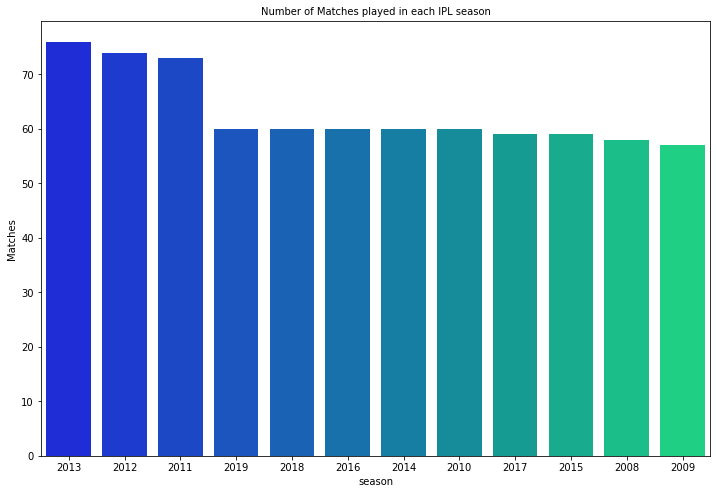

In [16]:
plt.figure(figsize = (12,8))
order = match_data['season'].value_counts(ascending=False).index
ax=sns.countplot('season',data=match_data ,order=order ,palette="winter")
plt.ylabel('Matches')
plt.title("Number of Matches played in each IPL season",fontsize=10)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

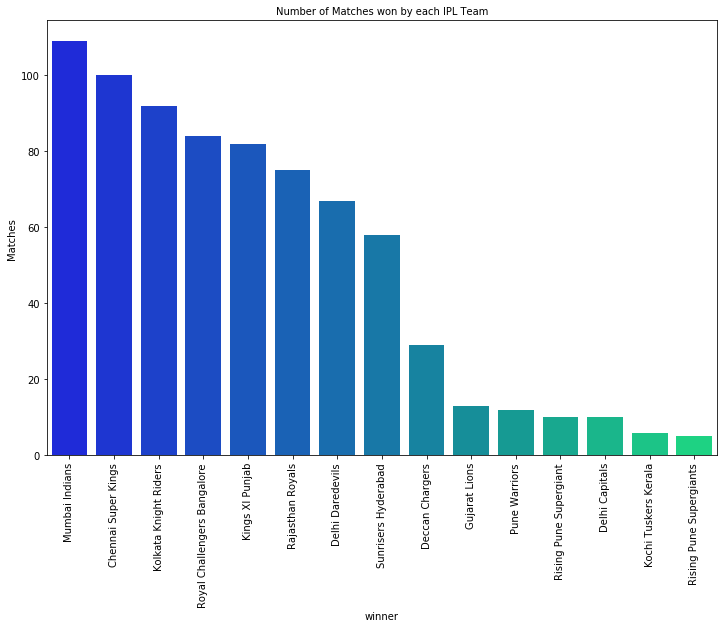

In [17]:
plt.figure(figsize = (12,8))
order = match_data['winner'].value_counts(ascending=False).index
ax=sns.countplot('winner',data=match_data ,order=order ,palette="winter")
plt.ylabel('Matches')
plt.title("Number of Matches won by each IPL Team",fontsize=10)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]), <a list of 41 Text xticklabel objects>)

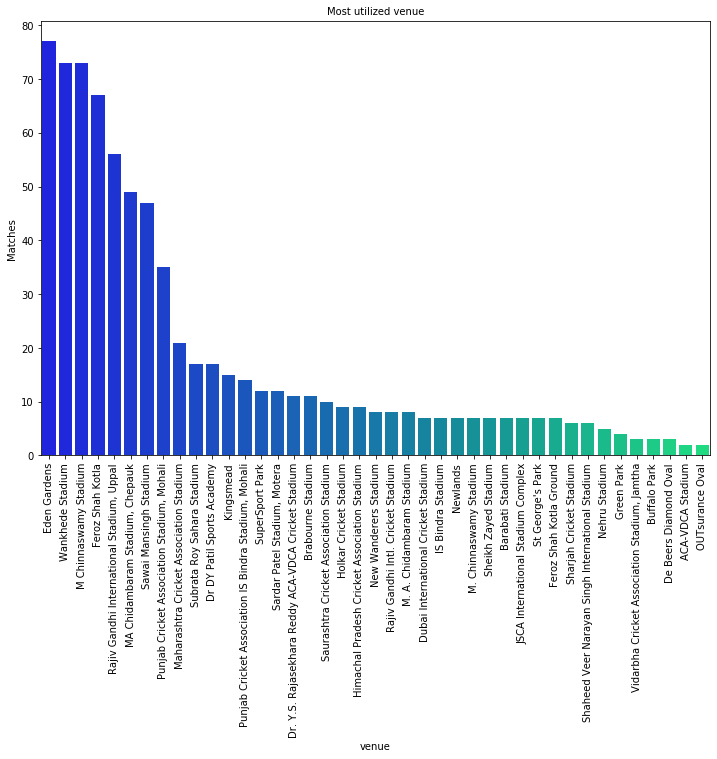

In [18]:
plt.figure(figsize = (12,8))
order = match_data['venue'].value_counts(ascending=False).index
ax=sns.countplot('venue',data=match_data ,order=order ,palette="winter")
plt.ylabel('Matches')
plt.title("Most utilized venue",fontsize=10)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

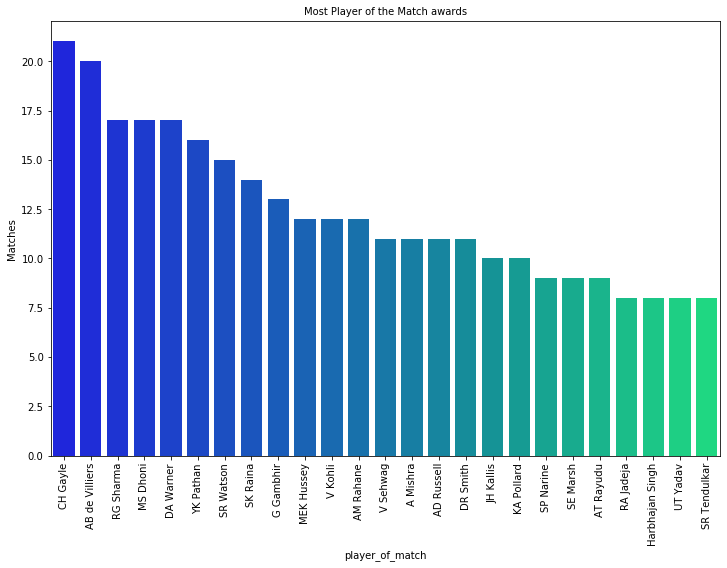

In [19]:
plt.figure(figsize = (12,8))
order = match_data['player_of_match'].value_counts(ascending=False).iloc[:25].index
ax=sns.countplot('player_of_match',data=match_data ,order=order ,palette="winter")
plt.ylabel('Matches')
plt.title("Most Player of the Match awards",fontsize=10)
plt.xticks(rotation=90)

In [21]:
match_data['win_by']=np.where(match_data['win_by_runs']>0,'Bat first','Bowl first')


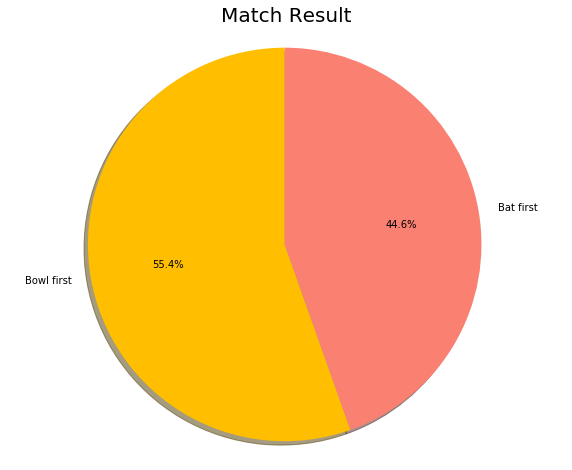

In [22]:
Win=match_data.win_by.value_counts()
labels=np.array(Win.index)
sizes = Win.values
colors = ['#FFBF00', '#FA8072']
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Match Result',fontsize=20)
plt.axis('equal',fontsize=10)
plt.show()

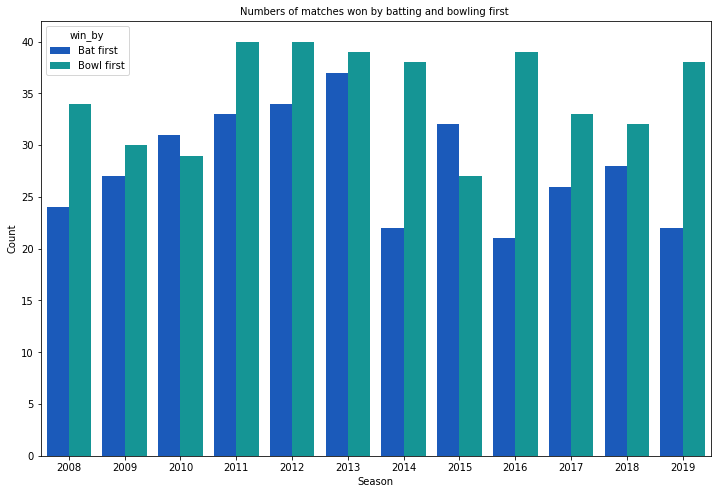

In [23]:
plt.figure(figsize = (12,8))
sns.countplot('season',hue='win_by',data=match_data,palette='winter')
plt.title("Numbers of matches won by batting and bowling first ",fontsize=10)
plt.xlabel("Season",fontsize=10)
plt.ylabel("Count",fontsize=10)
plt.show()

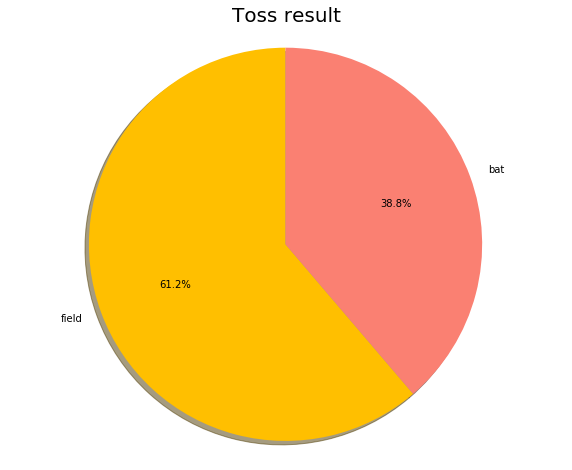

In [24]:
# we will plot pie chart on Toss decision
Toss=match_data.toss_decision.value_counts()
labels=np.array(Toss.index)
sizes = Toss.values
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Toss result',fontsize=20)
plt.axis('equal',fontsize=10)
plt.show()


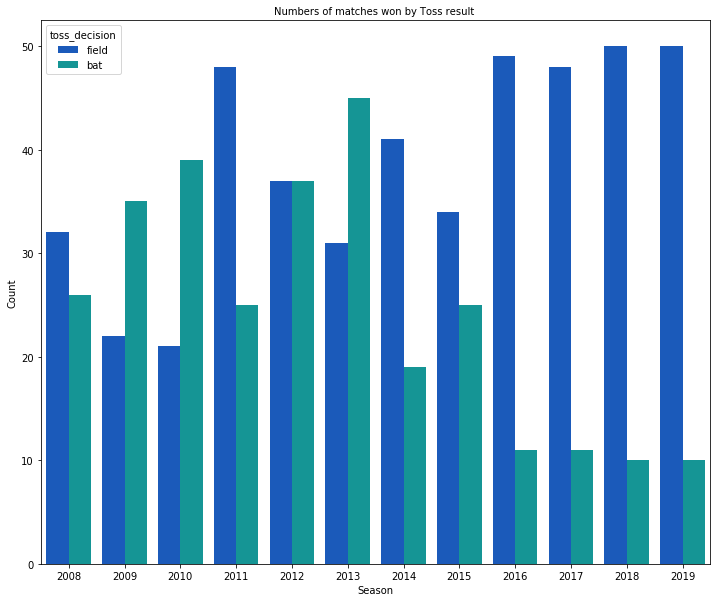

In [25]:
plt.figure(figsize = (12,10))
sns.countplot('season',hue='toss_decision',data=match_data,palette='winter')
plt.title("Numbers of matches won by Toss result ",fontsize=10)
plt.xlabel("Season",fontsize=10)
plt.ylabel("Count",fontsize=10)
plt.show()

In [26]:
final_matches=match_data.drop_duplicates(subset=['season'], keep='last')
final_matches[['season','winner']].reset_index(drop=True).sort_values('season')

,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


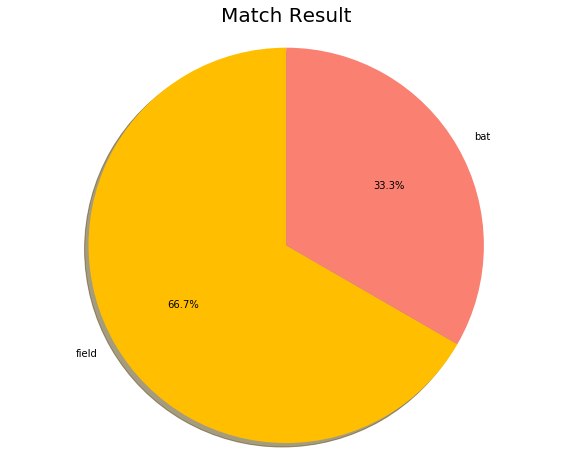

In [27]:
match = final_matches.win_by.value_counts()
labels=np.array(Toss.index)
sizes = match.values
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Match Result',fontsize=20)
plt.axis('equal',fontsize=10)
plt.show()

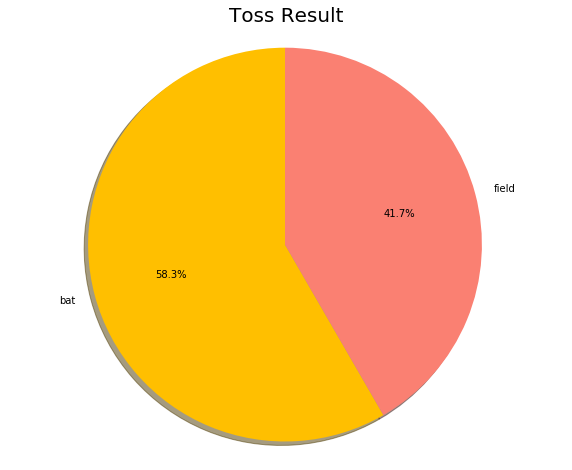

In [28]:
Toss=final_matches.toss_decision.value_counts()
labels=np.array(Toss.index)
sizes = Toss.values
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Toss Result',fontsize=20)
plt.axis('equal',fontsize=10)
plt.show()

In [30]:
final_matches.groupby(['city','winner']).size()

city          winner               
Bangalore     Kolkata Knight Riders    1
              Sunrisers Hyderabad      1
Chennai       Chennai Super Kings      1
              Kolkata Knight Riders    1
Hyderabad     Mumbai Indians           2
Johannesburg  Deccan Chargers          1
Kolkata       Mumbai Indians           2
Mumbai        Chennai Super Kings      2
              Rajasthan Royals         1
dtype: int64

In [31]:
final_matches["winner"].value_counts()

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Sunrisers Hyderabad      1
Rajasthan Royals         1
Deccan Chargers          1
Name: winner, dtype: int64

In [32]:
final_matches[['toss_winner','toss_decision','winner']].reset_index(drop=True)

,toss_winner,toss_decision,winner
0,Mumbai Indians,bat,Mumbai Indians
1,Rajasthan Royals,field,Rajasthan Royals
2,Royal Challengers Bangalore,field,Deccan Chargers
3,Chennai Super Kings,bat,Chennai Super Kings
4,Chennai Super Kings,bat,Chennai Super Kings
5,Chennai Super Kings,bat,Kolkata Knight Riders
6,Mumbai Indians,bat,Mumbai Indians
7,Kolkata Knight Riders,field,Kolkata Knight Riders
8,Chennai Super Kings,field,Mumbai Indians
9,Sunrisers Hyderabad,bat,Sunrisers Hyderabad


In [33]:
final_matches[['winner','player_of_match']].reset_index(drop=True)

,winner,player_of_match
0,Mumbai Indians,KH Pandya
1,Rajasthan Royals,YK Pathan
2,Deccan Chargers,A Kumble
3,Chennai Super Kings,SK Raina
4,Chennai Super Kings,M Vijay
5,Kolkata Knight Riders,MS Bisla
6,Mumbai Indians,KA Pollard
7,Kolkata Knight Riders,MK Pandey
8,Mumbai Indians,RG Sharma
9,Sunrisers Hyderabad,BCJ Cutting


In [34]:
len(final_matches[final_matches['toss_winner']==final_matches['winner']]['winner'])


9

In [35]:
four_data=complete_data[complete_data['batsman_runs']==4]
four_data.groupby('batting_team')['batsman_runs'].agg([('runs by fours','sum'),('fours','count')])

,runs by fours,fours
batting_team,,
Chennai Super Kings,8772,2193
Deccan Chargers,3828,957
Delhi Capitals,968,242
Delhi Daredevils,8632,2158
Gujarat Lions,1840,460
Kings XI Punjab,9832,2458
Kochi Tuskers Kerala,680,170
Kolkata Knight Riders,9736,2434
Mumbai Indians,10352,2588


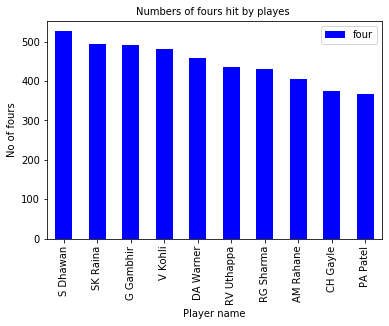

In [40]:
batsman_four=four_data.groupby('batsman')['batsman_runs'].agg([('four','count')]).reset_index().sort_values('four',ascending=0)
ax=batsman_four.iloc[:10,:].plot('batsman','four',kind='bar',color='blue')
plt.title("Numbers of fours hit by playes ",fontsize=10)
plt.xticks(rotation=90)
plt.xlabel("Player name",fontsize=10)
plt.ylabel("No of fours",fontsize=10)
plt.show()

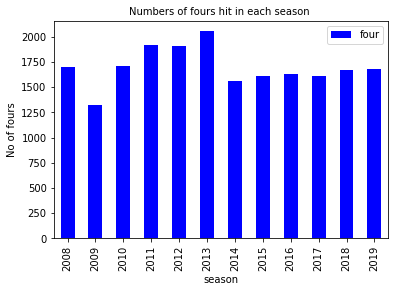

In [41]:
ax=four_data.groupby('season')['batsman_runs'].agg([('four','count')]).reset_index().plot('season','four',kind='bar',color = 'blue')
plt.title("Numbers of fours hit in each season ",fontsize=10)
plt.xticks(rotation=90)
plt.xlabel("season",fontsize=10)
plt.ylabel("No of fours",fontsize=10)
plt.show()

In [42]:
six_data=complete_data[complete_data['batsman_runs']==6]
six_data.groupby('batting_team')['batsman_runs'].agg([('runs by six','sum'),('sixes','count')])

,runs by six,sixes
batting_team,,
Chennai Super Kings,5838,973
Deccan Chargers,2400,400
Delhi Capitals,522,87
Delhi Daredevils,4806,801
Gujarat Lions,930,155
Kings XI Punjab,5856,976
Kochi Tuskers Kerala,318,53
Kolkata Knight Riders,5580,930
Mumbai Indians,6576,1096


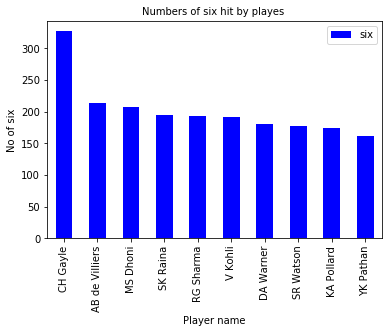

In [43]:
batsman_six=six_data.groupby('batsman')['batsman_runs'].agg([('six','count')]).reset_index().sort_values('six',ascending=0)
ax=batsman_six.iloc[:10,:].plot('batsman','six',kind='bar',color='blue')
plt.title("Numbers of six hit by playes ",fontsize=10)
plt.xticks(rotation=90)
plt.xlabel("Player name",fontsize=10)
plt.ylabel("No of six",fontsize=10)
plt.show()

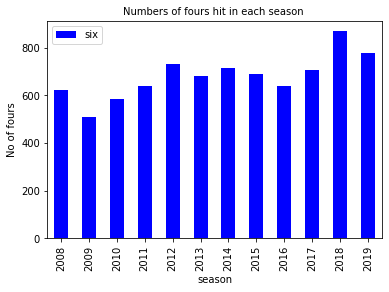

In [44]:
ax=six_data.groupby('season')['batsman_runs'].agg([('six','count')]).reset_index().plot('season','six',kind='bar',color = 'blue')
plt.title("Numbers of fours hit in each season ",fontsize=10)
plt.xticks(rotation=90)
plt.xlabel("season",fontsize=10)
plt.ylabel("No of fours",fontsize=10)
plt.show()

In [47]:
batsman_score=match_deliveries.groupby('batsman')['batsman_runs'].agg(['sum']).reset_index().sort_values('sum',ascending=False).reset_index(drop=True)
batsman_score=batsman_score.rename(columns={'sum':'batsman_runs'})
print("*** Top 10 Leading Run Scorer in IPL ***")
batsman_score.iloc[:10,:]

*** Top 10 Leading Run Scorer in IPL ***


,batsman,batsman_runs
0,V Kohli,5434
1,SK Raina,5415
2,RG Sharma,4914
3,DA Warner,4741
4,S Dhawan,4632
5,CH Gayle,4560
6,MS Dhoni,4477
7,RV Uthappa,4446
8,AB de Villiers,4428
9,G Gambhir,4223


In [48]:
No_Matches_player= match_deliveries[["match_id","player_dismissed"]]
No_Matches_player =No_Matches_player .groupby("player_dismissed")["match_id"].count().reset_index().sort_values(by="match_id",ascending=False).reset_index(drop=True)
No_Matches_player.columns=["batsman","No_of Matches"]
No_Matches_player .head(5)

,batsman,No_of Matches
0,SK Raina,162
1,RG Sharma,155
2,RV Uthappa,153
3,V Kohli,143
4,S Dhawan,137


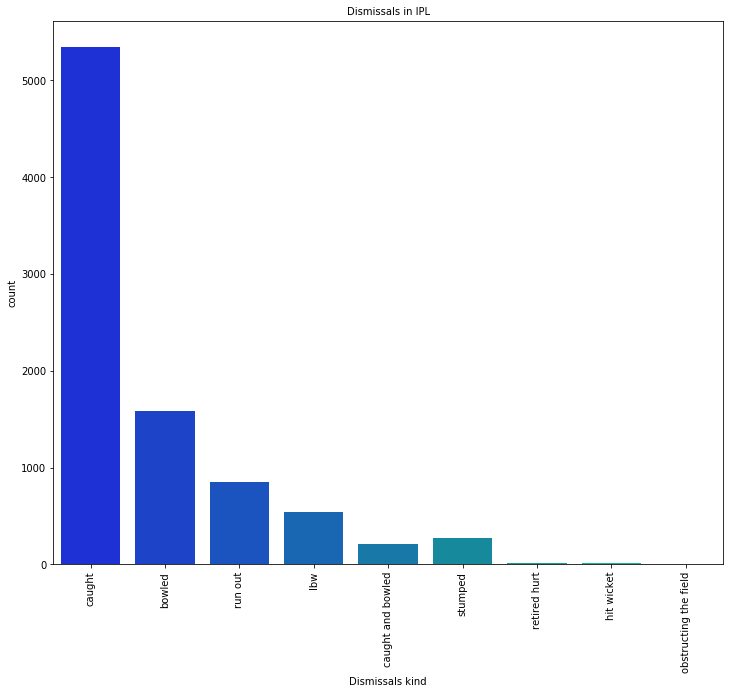

In [51]:
plt.figure(figsize=(12,10))
ax=sns.countplot(match_deliveries.dismissal_kind,palette='winter')
plt.title("Dismissals in IPL",fontsize=10)
plt.xlabel("Dismissals kind",fontsize=10)
plt.ylabel("count",fontsize=10)
plt.xticks(rotation=90)
plt.show()

In [52]:
wicket_data=match_deliveries.dropna(subset=['dismissal_kind'])
wicket_data=wicket_data[~wicket_data['dismissal_kind'].isin(['run out','retired hurt','obstructing the field'])]


In [53]:
wicket_data.groupby('bowler')['dismissal_kind'].agg(['count']).reset_index().sort_values('count',ascending=False).reset_index(drop=True).iloc[:10,:]

,bowler,count
0,SL Malinga,170
1,A Mishra,156
2,Harbhajan Singh,150
3,PP Chawla,149
4,DJ Bravo,147
5,B Kumar,133
6,R Ashwin,125
7,SP Narine,122
8,UT Yadav,119
9,RA Jadeja,108


Conclusion :

The highest number of match played in IPL season was 2013,2014,2015.

The highest number of match won by Mumbai Indians i.e 4 match out of 12 matches.

Teams which Bowl first has higher chances of winning then the team which bat first.

After winning toss more teams decide to do fielding first.

In finals teams which decide to do fielding first win the matches more then the team which bat first.

In finals most teams after winning toss decide to do fielding first.

Top player of match winning are CH gayle, AB de villers.

It is interesting that out of 12 IPL finals,9 times the team that won the toss was also the winner of IPL.

The highest number of four hit by player is Shikar Dhawan.

The highest number of six hit by player is CH gayle.

Top leading run scorer in IPL are Virat kholi, SK Raina, RG Sharma.

The highest number of matches played by player name are SK Raina, RG Sharma.

Dismissals in IPL was most by Catch out .

The IPL most wicket taken blower is SL Malinga.

Thank You!